In [1]:
from sail.core import VMSetup, registersafeobj,login,connect,pushsafeobj,querydata,get_fns
from sail.data import RemoteDataFrame, Utils
from sail.algo import fdxgb
import time
start_time = time.time()

In [2]:
import json, requests
soPath = "/Development/Milestone3/EndPointTools/SafeObjectEditor/KPMG/safeobjects"
contractdict = [{"DigitalContractGuid":"{327D1DC7-8235-4DE8-9F64-AD79D5545407}"}, {"DigitalContractGuid":"{33A6ADFE-7C3E-44E5-9D6E-28CA231B0B7D}"}]
backendIP = "52.150.26.47"

registersafeobj(soPath)
print("[P]safe objects registered")

[P]safe objects registered


In [3]:
eosb = login("r@r.r", "SailPassword@123", 6200, backendIP)
print("[P]login success")
print(eosb)

[P]login success
5iEQAhtloSNo/Zpt+iw//OlfxbDM7oCmbAqE/DI0IaxXGsDueB7M5hOQTO2qeObrDPXQbQ0DAACLxPERwTNObjIY2NiYRIYdaE7j0ElBkDzFv+Pl3S7iykXPqbzYlFTeRJFGrZo97VoXYmVmOmCyoHxcWKN/lZYoPo91+GW3dTB+c1XYjxDm4UwsLZ9nUV5qH6bFnLUrnTILrryBYf3vijR1Sh6gP8kMZz10Xs5+pha2rN7AfUhG86jlmJ/kFxU3vtRKPYhNgfqyfRpqHi2gXAw2cIeneItXg66/Z31IswqZ8wJ8GM9u9jwLW7VrWPkdW1nvfrPRYz8QjzfEZXNpTabpTBzhPh3r+GFv624SlQJEPKlSqaAe1yz0tvd6wdpAqNFZX07gSMz6EG1hf2E701TvIlGOmJek6Fir1VQ6wUESpvZYtsyykTsqaTyxLWfo0h08ZtjDf49miZMfktfJRtOZb6SV8Bp/4lMNDRLUx0TD53RBb18LxPwPbYoSb0YjmYO0sacgFnvZRWXuLJbVFOR15H47tPMuydjkq5FuYPnMlhYv88kMWTkIcf6VbIkyHa16O1Su03WuWwxdrm3/Td47Dpe0tBHIlf7hSb5zWoLp+NqWSaOAJbTwTmHASRN/mu4BLNx2SeWBYcfvbxbxediRSJnmGle7iUhODupaSqaO7mKKqjgi39tdWGWLeT7hGB4cqClzR5/DPqRkmh7M6XgKIuPx61mWJY6tQDgPC6jGfeFMSoz14id+yzGUPY3dPYj735MlgkvOfs+09uRf3adky6OQv0WWUcPgu8kSLKE1S3mLA3vOeWLMWr8guq+tg7IF0GjrtCBYcvzw8fnXZ16eCKITBkXjY035x/KXgW2do4N8ieR8GtSMxpDYs4xR+VXQYAdsuUDCu3U1acr1yAfoMp8EcMiWe7pQxVk0m6w6sM1TNWOr9lOz2xQWQ1auSbM6UKjdrrqOm+uTklaDFhy

In [4]:
url = "https://"+backendIP+":6200/SAIL/VirtualMachineManager/GetRunningVMsIpAdresses?Eosb="+eosb

payloads = []
for item in contractdict:
    temp = json.dumps(item)
    payloads.append(temp)

headers = {
    'Content-Type': 'application/json'
}

ips = []
for payload in payloads:
    print(payload)
    response = requests.request("GET", url, headers=headers, data=payload, verify=False)
    response = response.json()
    print(response)
    for key in response['VirtualMachines']:
        ips.append(response['VirtualMachines'][key])
        print(ips)

{"DigitalContractGuid": "{327D1DC7-8235-4DE8-9F64-AD79D5545407}"}


/usr/local/lib/python3.8/dist-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host '52.150.26.47'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


{'Status': 200.0, 'VirtualMachines': {'98685AB19BF9430687F39BD9679DDB6C': '20.124.215.24'}}
['20.124.215.24']
{"DigitalContractGuid": "{33A6ADFE-7C3E-44E5-9D6E-28CA231B0B7D}"}
{'Status': 200.0, 'VirtualMachines': {'4442D3D2CBD54226BC5288B2B67BBEF9': '20.124.9.128'}}
['20.124.215.24', '20.124.9.128']


/usr/local/lib/python3.8/dist-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host '52.150.26.47'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [5]:
vmids = []
for ip in ips:
    vmid = connect(ip, 3500)
    vmids.append(vmid)
print("[P]virtual machine connection to ip: {0} success".format(ip), flush=True)
    
fns = get_fns()
for vm in vmids:
    for key in fns:
        pushsafeobj(vm, fns[key])
print("[P]safe object pushed to virtual machines" , flush=True)

table = []
for vm in vmids:
    tableid = querydata(vm)
    table.append(tableid)
print("[P]obtain table ids", flush=True)

[P]virtual machine connection to ip: 20.124.9.128 success
[P]safe object pushed to virtual machines
[P]obtain table ids


In [6]:
table

[{'Telco1_split_1': 'F49CBDE2C8B685499CF1563D107683C4'},
 {'Telco1_split_2': '723857D0F2593848BB1714A2869CFAF1'}]

In [7]:
mid_time = time.time()


u1 = Utils(vmids[0], fns)
u2 = Utils(vmids[1], fns)
df1 = u1.read_csv(table[0]['Telco1_split_1'])
df2 = u2.read_csv(table[1]['Telco1_split_2'])
dfs = [df1, df2]

print(time.time() - mid_time)

10.011659860610962


In [8]:
dfs

['{D32466D8-3DF5-46C0-BF97-2AB55750A4DF}.5C37473C6D3443F49C03CAF0D746B997',
 '{9167FB0A-7905-47F9-A598-1D809056E50C}.5C37473C6D3443F49C03CAF0D746B997']

In [9]:
n=2
data1 = RemoteDataFrame(vmids[0], df1, fns)
data2 = RemoteDataFrame(vmids[1], df2, fns)
data = [data1, data2]

In [10]:
data

In [11]:
dtypes = data1.dtypes
type_dict = dict(dtypes)
cate_labels = [key for key in type_dict if type_dict[key] in ['bool', 'object']]
cate_labels.remove('phone number')

In [12]:
cols = []
cols.append(data1.columns)
cols.append(data2.columns)

In [13]:
y=[]
X=[]
n=2
for i in range(n):
    if 'phone number' in cols[i]:
        data[i].data_id = data[i].drop('phone number', axis = 1)
    data[i].data_id = data[i].label_encode(cate_labels)
    y.append(data[i]['churn'])
    X.append(data[i].drop('churn', axis = 1))

In [14]:
cols[0]

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [15]:
y_new = []
for item in y:
    y_new.append(item.data_id)
y=y_new
y

['{0699B902-EDC8-4017-9D1D-3B38F2BA1A46}.048E16B349F8450694B1B30E0E49E6CE',
 '{C54B2233-7414-48B5-A2B8-406A884B21D8}.048E16B349F8450694B1B30E0E49E6CE']

In [16]:
# !pip3 install optuna

In [17]:
import statistics
import optuna

def objective(trial, fdxgbmod, X, y, dim):
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import auc
    import numpy as np
    
    #trial partameter values
    max_depth = trial.suggest_int('max_depth', 6, 60, step=2)
    n_estimators = trial.suggest_int('n_estimators', 1, 50, step=2)
    learning_rate = trial.suggest_uniform('learning_rate', 0, 1)
    colsample_bytree = trial.suggest_uniform('colsample_bytree', 0, 1)
    colsample_bylevel = trial.suggest_uniform('colsample_bylevel', 0, 1)
    gamma = trial.suggest_uniform('gamma', 0, 1e-08)
    max_delta_step = trial.suggest_int('max_delta_step', 0, 40, step=1)
    reg_lambda = trial.suggest_int('reg_lambda', 0, 100, step=2)
    subsample = trial.suggest_uniform('subsample', 0, 1)
    scale_pos_weight = trial.suggest_uniform('scale_pos_weight', 0.5, 1)
    reg_alpha = trial.suggest_uniform('reg_alpha', 0, 1e-05)

    
    model_params = {
        "colsample_bylevel": colsample_bylevel,
        "colsample_bytree": colsample_bytree,
        "gamma": gamma,
        "learning_rate": learning_rate,
        "max_delta_step": max_delta_step,
        "max_depth": max_depth,
        "n_estimators": n_estimators,
        "reg_alpha": reg_alpha,
        "reg_lambda": reg_lambda,
        "subsample": subsample,
        "scale_pos_weight": scale_pos_weight
        }

    #train the a new model
    fdxgbmod.params =  model_params
    fdxgbmod.feature_num =  dim
    model = fdxgbmod.fit(X, y)
    
    #evaluate the model in terms of accuracy
    results =  fdxgbmod.aucpr_score(model, X, y)
    precision = results[0][0]
    recall = results[0][2]
    
    recall = np.append(recall, [1])    
    
    #calculate area under curve
    auc_precision_recall = auc(recall, precision)

    #return area under curve
    return auc_precision_recall

In [18]:
mid_time = time.time()

dim = len(cols[0])-2
study = optuna.create_study(direction="maximize")
fdxgbmod = fdxgb(vmids, feature_num=dim)

n=50
study.optimize(lambda trial: objective(trial, fdxgbmod, X, y, dim), n_trials=n)

print(time.time() - mid_time)

[I 2021-11-23 02:47:08,735] A new study created in memory with name: no-name-d222e250-c8d2-477d-9d27-968841bc33a5
/usr/local/lib/python3.8/dist-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [1, 50] and step=2, but the range is not divisible by `step`. It will be replaced by [1, 49].
  warnings.warn(


all_hashes has len 3332
all_counters has len 3332
1
[02:47:19] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Tree 1
Tree 2
Tree 3
Tree 4
Tree 5


[I 2021-11-23 02:47:53,336] Trial 0 finished with value: 0.4768006780160953 and parameters: {'max_depth': 38, 'n_estimators': 5, 'learning_rate': 0.12195853515088217, 'colsample_bytree': 0.7223471226390079, 'colsample_bylevel': 0.7182976694681455, 'gamma': 2.253743213608197e-09, 'max_delta_step': 1, 'reg_lambda': 92, 'subsample': 0.840605343555703, 'scale_pos_weight': 0.5530157325904994, 'reg_alpha': 5.533041541278494e-06}. Best is trial 0 with value: 0.4768006780160953.
/usr/local/lib/python3.8/dist-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [1, 50] and step=2, but the range is not divisible by `step`. It will be replaced by [1, 49].
  warnings.warn(


all_hashes has len 3332
all_counters has len 3332
1
[02:48:04] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Tree 1
Tree 2
Tree 3
Tree 4
Tree 5
Tree 6
Tree 7
Tree 8
Tree 9
Tree 10
Tree 11
Tree 12
Tree 13
Tree 14
Tree 15
Tree 16
Tree 17
Tree 18
Tree 19
Tree 20
Tree 21
Tree 22
Tree 23
Tree 24
Tree 25
Tree 26
Tree 27
Tree 28
Tree 29


[I 2021-11-23 02:51:03,383] Trial 1 finished with value: 0.7141426886049587 and parameters: {'max_depth': 60, 'n_estimators': 29, 'learning_rate': 0.1720693119911667, 'colsample_bytree': 0.6411933645672472, 'colsample_bylevel': 0.47538350575626653, 'gamma': 9.626484376646094e-09, 'max_delta_step': 20, 'reg_lambda': 40, 'subsample': 0.8558035659595278, 'scale_pos_weight': 0.821450397957272, 'reg_alpha': 7.397249597630586e-06}. Best is trial 1 with value: 0.7141426886049587.
/usr/local/lib/python3.8/dist-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [1, 50] and step=2, but the range is not divisible by `step`. It will be replaced by [1, 49].
  warnings.warn(


all_hashes has len 3332
all_counters has len 3332
1
[02:51:13] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Tree 1
Tree 2
Tree 3
Tree 4
Tree 5
Tree 6
Tree 7
Tree 8
Tree 9
Tree 10
Tree 11
Tree 12
Tree 13
Tree 14
Tree 15
Tree 16
Tree 17
Tree 18
Tree 19
Tree 20
Tree 21
Tree 22
Tree 23
Tree 24
Tree 25
Tree 26
Tree 27
Tree 28
Tree 29
Tree 30
Tree 31
Tree 32
Tree 33
Tree 34
Tree 35
Tree 36
Tree 37
Tree 38
Tree 39
Tree 40
Tree 41
Tree 42
Tree 43
Tree 44
Tree 45
Tree 46
Tree 47
Tree 48
Tree 49


[I 2021-11-23 02:56:14,526] Trial 2 finished with value: 0.8390272464320199 and parameters: {'max_depth': 16, 'n_estimators': 49, 'learning_rate': 0.9862057455708874, 'colsample_bytree': 0.9488765594128494, 'colsample_bylevel': 0.36864023221092634, 'gamma': 1.8030543625907413e-09, 'max_delta_step': 4, 'reg_lambda': 34, 'subsample': 0.5874769320334003, 'scale_pos_weight': 0.7362690478674065, 'reg_alpha': 2.7542100407214503e-07}. Best is trial 2 with value: 0.8390272464320199.
/usr/local/lib/python3.8/dist-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [1, 50] and step=2, but the range is not divisible by `step`. It will be replaced by [1, 49].
  warnings.warn(


all_hashes has len 3332
all_counters has len 3332
1
[02:56:25] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Tree 1
Tree 2
Tree 3
Tree 4
Tree 5
Tree 6
Tree 7
Tree 8
Tree 9
Tree 10
Tree 11
Tree 12
Tree 13
Tree 14
Tree 15
Tree 16
Tree 17
Tree 18
Tree 19
Tree 20
Tree 21
Tree 22
Tree 23
Tree 24
Tree 25
Tree 26
Tree 27
Tree 28
Tree 29
Tree 30
Tree 31
Tree 32
Tree 33
Tree 34
Tree 35
Tree 36
Tree 37
Tree 38
Tree 39
Tree 40
Tree 41
Tree 42
Tree 43
Tree 44
Tree 45
Tree 46
Tree 47
Tree 48
Tree 49


[I 2021-11-23 03:01:26,916] Trial 3 finished with value: 0.9282516557038125 and parameters: {'max_depth': 24, 'n_estimators': 49, 'learning_rate': 0.2352900713296252, 'colsample_bytree': 0.743094423387173, 'colsample_bylevel': 0.7970769504494325, 'gamma': 7.244713526140955e-09, 'max_delta_step': 40, 'reg_lambda': 6, 'subsample': 0.969143131945847, 'scale_pos_weight': 0.89739727485828, 'reg_alpha': 2.4313423364963496e-06}. Best is trial 3 with value: 0.9282516557038125.
/usr/local/lib/python3.8/dist-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [1, 50] and step=2, but the range is not divisible by `step`. It will be replaced by [1, 49].
  warnings.warn(


all_hashes has len 3332
all_counters has len 3332
1
[03:01:37] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Tree 1
Tree 2
Tree 3


[I 2021-11-23 03:01:57,446] Trial 4 finished with value: 0.5022609881214157 and parameters: {'max_depth': 26, 'n_estimators': 3, 'learning_rate': 0.5490248806144973, 'colsample_bytree': 0.4970119920297773, 'colsample_bylevel': 0.7573058562760829, 'gamma': 1.5219577200690592e-09, 'max_delta_step': 17, 'reg_lambda': 78, 'subsample': 0.09410047548314726, 'scale_pos_weight': 0.9153744948291336, 'reg_alpha': 2.808411271356417e-06}. Best is trial 3 with value: 0.9282516557038125.
/usr/local/lib/python3.8/dist-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [1, 50] and step=2, but the range is not divisible by `step`. It will be replaced by [1, 49].
  warnings.warn(


all_hashes has len 3332
all_counters has len 3332
1
[03:02:07] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Tree 1
Tree 2
Tree 3
Tree 4
Tree 5
Tree 6
Tree 7
Tree 8
Tree 9
Tree 10
Tree 11
Tree 12
Tree 13


[I 2021-11-23 03:03:28,307] Trial 5 finished with value: 0.4702863485939315 and parameters: {'max_depth': 44, 'n_estimators': 13, 'learning_rate': 0.17882872893939816, 'colsample_bytree': 0.07437287491913258, 'colsample_bylevel': 0.1670916411175598, 'gamma': 9.620509826610753e-09, 'max_delta_step': 11, 'reg_lambda': 28, 'subsample': 0.8548976888185137, 'scale_pos_weight': 0.7370800421813835, 'reg_alpha': 1.6488275101401819e-06}. Best is trial 3 with value: 0.9282516557038125.
/usr/local/lib/python3.8/dist-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [1, 50] and step=2, but the range is not divisible by `step`. It will be replaced by [1, 49].
  warnings.warn(


all_hashes has len 3332
all_counters has len 3332
1
[03:03:38] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Tree 1
Tree 2
Tree 3
Tree 4
Tree 5
Tree 6
Tree 7
Tree 8
Tree 9
Tree 10
Tree 11
Tree 12
Tree 13
Tree 14
Tree 15
Tree 16
Tree 17
Tree 18
Tree 19
Tree 20
Tree 21


[I 2021-11-23 03:05:49,346] Trial 6 finished with value: 0.6361740248855201 and parameters: {'max_depth': 24, 'n_estimators': 21, 'learning_rate': 0.4363311286921612, 'colsample_bytree': 0.15528844833788025, 'colsample_bylevel': 0.5477318015341097, 'gamma': 7.548170200042708e-09, 'max_delta_step': 7, 'reg_lambda': 54, 'subsample': 0.38649829381326506, 'scale_pos_weight': 0.5505040157914283, 'reg_alpha': 8.794900629607328e-07}. Best is trial 3 with value: 0.9282516557038125.
/usr/local/lib/python3.8/dist-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [1, 50] and step=2, but the range is not divisible by `step`. It will be replaced by [1, 49].
  warnings.warn(


all_hashes has len 3332
all_counters has len 3332
1
[03:05:59] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Tree 1
Tree 2
Tree 3
Tree 4
Tree 5
Tree 6
Tree 7
Tree 8
Tree 9
Tree 10
Tree 11
Tree 12
Tree 13
Tree 14
Tree 15
Tree 16
Tree 17
Tree 18
Tree 19
Tree 20
Tree 21
Tree 22
Tree 23
Tree 24
Tree 25
Tree 26
Tree 27
Tree 28
Tree 29
Tree 30
Tree 31
Tree 32
Tree 33
Tree 34
Tree 35
Tree 36
Tree 37
Tree 38
Tree 39


[I 2021-11-23 03:09:58,818] Trial 7 finished with value: 0.704961150131228 and parameters: {'max_depth': 8, 'n_estimators': 39, 'learning_rate': 0.4229487266315841, 'colsample_bytree': 0.6869418815679612, 'colsample_bylevel': 0.33108989644405273, 'gamma': 3.584410166947606e-09, 'max_delta_step': 2, 'reg_lambda': 92, 'subsample': 0.0518932193799031, 'scale_pos_weight': 0.7948806924768126, 'reg_alpha': 2.472488403395641e-06}. Best is trial 3 with value: 0.9282516557038125.
/usr/local/lib/python3.8/dist-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [1, 50] and step=2, but the range is not divisible by `step`. It will be replaced by [1, 49].
  warnings.warn(


all_hashes has len 3332
all_counters has len 3332
1
[03:10:09] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Tree 1
Tree 2
Tree 3
Tree 4
Tree 5
Tree 6
Tree 7
Tree 8
Tree 9
Tree 10
Tree 11
Tree 12
Tree 13
Tree 14
Tree 15
Tree 16
Tree 17
Tree 18
Tree 19
Tree 20
Tree 21
Tree 22
Tree 23
Tree 24
Tree 25
Tree 26
Tree 27
Tree 28
Tree 29
Tree 30
Tree 31
Tree 32
Tree 33
Tree 34
Tree 35
Tree 36
Tree 37
Tree 38
Tree 39
Tree 40
Tree 41
Tree 42
Tree 43
Tree 44
Tree 45
Tree 46
Tree 47


[I 2021-11-23 03:14:56,939] Trial 8 finished with value: 0.6023140311195224 and parameters: {'max_depth': 40, 'n_estimators': 47, 'learning_rate': 0.36979917878728574, 'colsample_bytree': 0.39392751251167546, 'colsample_bylevel': 0.15542567018161513, 'gamma': 1.3469318715090873e-09, 'max_delta_step': 18, 'reg_lambda': 92, 'subsample': 0.2672167523946676, 'scale_pos_weight': 0.8563842821199588, 'reg_alpha': 5.635016520816983e-07}. Best is trial 3 with value: 0.9282516557038125.
/usr/local/lib/python3.8/dist-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [1, 50] and step=2, but the range is not divisible by `step`. It will be replaced by [1, 49].
  warnings.warn(


all_hashes has len 3332
all_counters has len 3332
1
[03:15:07] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Tree 1
Tree 2
Tree 3
Tree 4
Tree 5
Tree 6
Tree 7
Tree 8
Tree 9
Tree 10
Tree 11
Tree 12
Tree 13
Tree 14
Tree 15
Tree 16
Tree 17
Tree 18
Tree 19
Tree 20
Tree 21
Tree 22
Tree 23
Tree 24
Tree 25
Tree 26
Tree 27
Tree 28
Tree 29
Tree 30
Tree 31
Tree 32
Tree 33
Tree 34
Tree 35
Tree 36
Tree 37
Tree 38
Tree 39


[I 2021-11-23 03:19:07,213] Trial 9 finished with value: 0.7053828621405097 and parameters: {'max_depth': 46, 'n_estimators': 39, 'learning_rate': 0.20015680252152357, 'colsample_bytree': 0.31835418960712136, 'colsample_bylevel': 0.7610005311160692, 'gamma': 1.571092453491616e-09, 'max_delta_step': 38, 'reg_lambda': 46, 'subsample': 0.8202209133784097, 'scale_pos_weight': 0.7614170034538643, 'reg_alpha': 2.481134044333534e-06}. Best is trial 3 with value: 0.9282516557038125.
/usr/local/lib/python3.8/dist-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [1, 50] and step=2, but the range is not divisible by `step`. It will be replaced by [1, 49].
  warnings.warn(


all_hashes has len 3332
all_counters has len 3332
1
[03:19:17] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Tree 1
Tree 2
Tree 3
Tree 4
Tree 5
Tree 6
Tree 7
Tree 8
Tree 9
Tree 10
Tree 11
Tree 12
Tree 13
Tree 14
Tree 15
Tree 16
Tree 17
Tree 18
Tree 19
Tree 20
Tree 21
Tree 22
Tree 23
Tree 24
Tree 25
Tree 26
Tree 27
Tree 28
Tree 29


[I 2021-11-23 03:22:17,037] Trial 10 finished with value: 0.8781973723688513 and parameters: {'max_depth': 28, 'n_estimators': 29, 'learning_rate': 0.8321462186133628, 'colsample_bytree': 0.9990238118552158, 'colsample_bylevel': 0.9455046584013357, 'gamma': 6.373626618704128e-09, 'max_delta_step': 38, 'reg_lambda': 4, 'subsample': 0.6364880476007688, 'scale_pos_weight': 0.9917125232815837, 'reg_alpha': 9.080655599812696e-06}. Best is trial 3 with value: 0.9282516557038125.
/usr/local/lib/python3.8/dist-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [1, 50] and step=2, but the range is not divisible by `step`. It will be replaced by [1, 49].
  warnings.warn(


all_hashes has len 3332
all_counters has len 3332
1
[03:22:27] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Tree 1
Tree 2
Tree 3
Tree 4
Tree 5
Tree 6
Tree 7
Tree 8
Tree 9
Tree 10
Tree 11
Tree 12
Tree 13
Tree 14
Tree 15
Tree 16
Tree 17
Tree 18
Tree 19
Tree 20
Tree 21
Tree 22
Tree 23
Tree 24
Tree 25
Tree 26
Tree 27
Tree 28
Tree 29


[I 2021-11-23 03:25:26,806] Trial 11 finished with value: 0.8842440516162409 and parameters: {'max_depth': 22, 'n_estimators': 29, 'learning_rate': 0.8053647297122609, 'colsample_bytree': 0.9974215726636309, 'colsample_bylevel': 0.9992841427801326, 'gamma': 6.361210420326161e-09, 'max_delta_step': 38, 'reg_lambda': 4, 'subsample': 0.624657772240952, 'scale_pos_weight': 0.984788235550024, 'reg_alpha': 9.945196885362526e-06}. Best is trial 3 with value: 0.9282516557038125.
/usr/local/lib/python3.8/dist-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [1, 50] and step=2, but the range is not divisible by `step`. It will be replaced by [1, 49].
  warnings.warn(


all_hashes has len 3332
all_counters has len 3332
1
[03:25:37] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Tree 1
Tree 2
Tree 3
Tree 4
Tree 5
Tree 6
Tree 7
Tree 8
Tree 9
Tree 10
Tree 11
Tree 12
Tree 13
Tree 14
Tree 15
Tree 16
Tree 17
Tree 18
Tree 19
Tree 20
Tree 21
Tree 22
Tree 23
Tree 24
Tree 25
Tree 26
Tree 27
Tree 28
Tree 29
Tree 30
Tree 31
Tree 32
Tree 33
Tree 34
Tree 35
Tree 36
Tree 37


[I 2021-11-23 03:29:25,084] Trial 12 finished with value: 0.8954104569738237 and parameters: {'max_depth': 14, 'n_estimators': 37, 'learning_rate': 0.7342107651298412, 'colsample_bytree': 0.8293488668671278, 'colsample_bylevel': 0.9993636136712832, 'gamma': 5.732080362340865e-09, 'max_delta_step': 30, 'reg_lambda': 4, 'subsample': 0.6936661456164548, 'scale_pos_weight': 0.9902699330285124, 'reg_alpha': 4.553269399132423e-06}. Best is trial 3 with value: 0.9282516557038125.
/usr/local/lib/python3.8/dist-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [1, 50] and step=2, but the range is not divisible by `step`. It will be replaced by [1, 49].
  warnings.warn(


all_hashes has len 3332
all_counters has len 3332
1
[03:29:35] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Tree 1
Tree 2
Tree 3
Tree 4
Tree 5
Tree 6
Tree 7
Tree 8
Tree 9
Tree 10
Tree 11
Tree 12
Tree 13
Tree 14
Tree 15
Tree 16
Tree 17
Tree 18
Tree 19
Tree 20
Tree 21
Tree 22
Tree 23
Tree 24
Tree 25
Tree 26
Tree 27
Tree 28
Tree 29
Tree 30
Tree 31
Tree 32
Tree 33
Tree 34
Tree 35
Tree 36
Tree 37
Tree 38
Tree 39


[I 2021-11-23 03:33:35,165] Trial 13 finished with value: 0.8931205174043751 and parameters: {'max_depth': 6, 'n_estimators': 39, 'learning_rate': 0.6539881864606261, 'colsample_bytree': 0.8241259267758493, 'colsample_bylevel': 0.8350054342402679, 'gamma': 4.80277992985939e-09, 'max_delta_step': 29, 'reg_lambda': 16, 'subsample': 0.9793679111166188, 'scale_pos_weight': 0.9098747145229735, 'reg_alpha': 4.248929104380636e-06}. Best is trial 3 with value: 0.9282516557038125.
/usr/local/lib/python3.8/dist-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [1, 50] and step=2, but the range is not divisible by `step`. It will be replaced by [1, 49].
  warnings.warn(


all_hashes has len 3332
all_counters has len 3332
1
[03:33:45] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Tree 1
Tree 2
Tree 3
Tree 4
Tree 5
Tree 6
Tree 7
Tree 8
Tree 9
Tree 10
Tree 11
Tree 12
Tree 13
Tree 14
Tree 15
Tree 16
Tree 17
Tree 18
Tree 19
Tree 20
Tree 21
Tree 22
Tree 23
Tree 24
Tree 25
Tree 26
Tree 27
Tree 28
Tree 29
Tree 30
Tree 31
Tree 32
Tree 33
Tree 34
Tree 35
Tree 36
Tree 37
Tree 38
Tree 39
Tree 40
Tree 41
Tree 42
Tree 43


[I 2021-11-23 03:38:09,221] Trial 14 finished with value: 0.46356191077902187 and parameters: {'max_depth': 16, 'n_estimators': 43, 'learning_rate': 0.006669190793467478, 'colsample_bytree': 0.7852284207014415, 'colsample_bylevel': 0.6210009381740935, 'gamma': 7.655731018177234e-09, 'max_delta_step': 29, 'reg_lambda': 18, 'subsample': 0.964590997203028, 'scale_pos_weight': 0.9222325512074243, 'reg_alpha': 4.5731366179585885e-06}. Best is trial 3 with value: 0.9282516557038125.
/usr/local/lib/python3.8/dist-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [1, 50] and step=2, but the range is not divisible by `step`. It will be replaced by [1, 49].
  warnings.warn(


all_hashes has len 3332
all_counters has len 3332
1
[03:38:19] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Tree 1
Tree 2
Tree 3
Tree 4
Tree 5
Tree 6
Tree 7
Tree 8
Tree 9
Tree 10
Tree 11
Tree 12
Tree 13
Tree 14
Tree 15
Tree 16
Tree 17
Tree 18
Tree 19
Tree 20
Tree 21
Tree 22
Tree 23
Tree 24
Tree 25
Tree 26
Tree 27
Tree 28
Tree 29
Tree 30
Tree 31
Tree 32
Tree 33
Tree 34
Tree 35


[I 2021-11-23 03:41:55,365] Trial 15 finished with value: 0.7271644897667108 and parameters: {'max_depth': 14, 'n_estimators': 35, 'learning_rate': 0.6198198957575856, 'colsample_bytree': 0.5679765885112851, 'colsample_bylevel': 0.897131143191763, 'gamma': 4.795018300220442e-09, 'max_delta_step': 30, 'reg_lambda': 62, 'subsample': 0.7089494601446404, 'scale_pos_weight': 0.6559322515809339, 'reg_alpha': 6.351644002273623e-06}. Best is trial 3 with value: 0.9282516557038125.
/usr/local/lib/python3.8/dist-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [1, 50] and step=2, but the range is not divisible by `step`. It will be replaced by [1, 49].
  warnings.warn(


all_hashes has len 3332
all_counters has len 3332
1
[03:42:05] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Tree 1
Tree 2
Tree 3
Tree 4
Tree 5
Tree 6
Tree 7
Tree 8
Tree 9
Tree 10
Tree 11
Tree 12
Tree 13
Tree 14
Tree 15
Tree 16
Tree 17
Tree 18
Tree 19
Tree 20
Tree 21
Tree 22
Tree 23
Tree 24
Tree 25
Tree 26
Tree 27
Tree 28
Tree 29
Tree 30
Tree 31
Tree 32
Tree 33
Tree 34
Tree 35
Tree 36
Tree 37
Tree 38
Tree 39
Tree 40
Tree 41
Tree 42
Tree 43
Tree 44
Tree 45


[I 2021-11-23 03:46:41,870] Trial 16 finished with value: 0.8293505718520667 and parameters: {'max_depth': 34, 'n_estimators': 45, 'learning_rate': 0.29248266811276136, 'colsample_bytree': 0.8790866315523819, 'colsample_bylevel': 0.8682819988260926, 'gamma': 7.98784522648175e-09, 'max_delta_step': 33, 'reg_lambda': 18, 'subsample': 0.47925403847241604, 'scale_pos_weight': 0.8664440981413818, 'reg_alpha': 3.6650049840533397e-06}. Best is trial 3 with value: 0.9282516557038125.
/usr/local/lib/python3.8/dist-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [1, 50] and step=2, but the range is not divisible by `step`. It will be replaced by [1, 49].
  warnings.warn(


all_hashes has len 3332
all_counters has len 3332
1
[03:46:52] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Tree 1
Tree 2
Tree 3
Tree 4
Tree 5
Tree 6
Tree 7
Tree 8
Tree 9
Tree 10
Tree 11
Tree 12
Tree 13
Tree 14
Tree 15
Tree 16
Tree 17
Tree 18
Tree 19
Tree 20
Tree 21
Tree 22
Tree 23
Tree 24
Tree 25
Tree 26
Tree 27
Tree 28
Tree 29
Tree 30
Tree 31
Tree 32
Tree 33
Tree 34
Tree 35


[I 2021-11-23 03:50:28,295] Trial 17 finished with value: 0.7362121895575642 and parameters: {'max_depth': 12, 'n_estimators': 35, 'learning_rate': 0.7205611789656121, 'colsample_bytree': 0.5671712737268715, 'colsample_bylevel': 0.005172855335578153, 'gamma': 6.31571234028105e-09, 'max_delta_step': 25, 'reg_lambda': 4, 'subsample': 0.7238165991902958, 'scale_pos_weight': 0.9564357418058881, 'reg_alpha': 6.311216622022729e-06}. Best is trial 3 with value: 0.9282516557038125.
/usr/local/lib/python3.8/dist-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [1, 50] and step=2, but the range is not divisible by `step`. It will be replaced by [1, 49].
  warnings.warn(


all_hashes has len 3332
all_counters has len 3332
1
[03:50:38] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Tree 1
Tree 2
Tree 3
Tree 4
Tree 5
Tree 6
Tree 7
Tree 8
Tree 9
Tree 10
Tree 11
Tree 12
Tree 13
Tree 14
Tree 15
Tree 16
Tree 17
Tree 18
Tree 19


[I 2021-11-23 03:52:37,457] Trial 18 finished with value: 0.8116224989841335 and parameters: {'max_depth': 20, 'n_estimators': 19, 'learning_rate': 0.9965898779739357, 'colsample_bytree': 0.8669911845586828, 'colsample_bylevel': 0.6750725830582098, 'gamma': 3.000284394808913e-09, 'max_delta_step': 33, 'reg_lambda': 26, 'subsample': 0.48692760896478937, 'scale_pos_weight': 0.6739819625481006, 'reg_alpha': 7.71717859579508e-06}. Best is trial 3 with value: 0.9282516557038125.
/usr/local/lib/python3.8/dist-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [1, 50] and step=2, but the range is not divisible by `step`. It will be replaced by [1, 49].
  warnings.warn(


all_hashes has len 3332
all_counters has len 3332
1
[03:52:48] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Tree 1
Tree 2
Tree 3
Tree 4
Tree 5
Tree 6
Tree 7
Tree 8
Tree 9
Tree 10
Tree 11
Tree 12
Tree 13
Tree 14
Tree 15
Tree 16
Tree 17
Tree 18
Tree 19
Tree 20
Tree 21
Tree 22
Tree 23
Tree 24
Tree 25
Tree 26
Tree 27
Tree 28
Tree 29
Tree 30
Tree 31
Tree 32
Tree 33
Tree 34
Tree 35
Tree 36
Tree 37
Tree 38
Tree 39
Tree 40
Tree 41
Tree 42
Tree 43
Tree 44
Tree 45
Tree 46
Tree 47
Tree 48
Tree 49


[I 2021-11-23 03:57:48,398] Trial 19 finished with value: 0.7224214817565939 and parameters: {'max_depth': 30, 'n_estimators': 49, 'learning_rate': 0.5157362690429607, 'colsample_bytree': 0.7756116231226351, 'colsample_bylevel': 0.9976348802720955, 'gamma': 1.8097550249929783e-10, 'max_delta_step': 23, 'reg_lambda': 0, 'subsample': 0.3167149191062999, 'scale_pos_weight': 0.8668763478984871, 'reg_alpha': 5.266825823817119e-06}. Best is trial 3 with value: 0.9282516557038125.
/usr/local/lib/python3.8/dist-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [1, 50] and step=2, but the range is not divisible by `step`. It will be replaced by [1, 49].
  warnings.warn(


all_hashes has len 3332
all_counters has len 3332
1
[03:57:59] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Tree 1
Tree 2
Tree 3
Tree 4
Tree 5
Tree 6
Tree 7
Tree 8
Tree 9
Tree 10
Tree 11
Tree 12
Tree 13
Tree 14
Tree 15
Tree 16
Tree 17
Tree 18
Tree 19
Tree 20
Tree 21
Tree 22
Tree 23
Tree 24
Tree 25
Tree 26
Tree 27
Tree 28
Tree 29
Tree 30
Tree 31
Tree 32
Tree 33
Tree 34
Tree 35
Tree 36
Tree 37
Tree 38
Tree 39
Tree 40
Tree 41
Tree 42
Tree 43


[I 2021-11-23 04:02:23,555] Trial 20 finished with value: 0.7624050493914529 and parameters: {'max_depth': 20, 'n_estimators': 43, 'learning_rate': 0.3089079034662358, 'colsample_bytree': 0.4247058478769478, 'colsample_bylevel': 0.8337171238946595, 'gamma': 8.794601813355631e-09, 'max_delta_step': 40, 'reg_lambda': 14, 'subsample': 0.7439281676076692, 'scale_pos_weight': 0.9520237034560948, 'reg_alpha': 3.4688770576252895e-06}. Best is trial 3 with value: 0.9282516557038125.
/usr/local/lib/python3.8/dist-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [1, 50] and step=2, but the range is not divisible by `step`. It will be replaced by [1, 49].
  warnings.warn(


all_hashes has len 3332
all_counters has len 3332
1
[04:02:34] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Tree 1
Tree 2
Tree 3
Tree 4
Tree 5
Tree 6
Tree 7
Tree 8
Tree 9
Tree 10
Tree 11
Tree 12
Tree 13
Tree 14
Tree 15
Tree 16
Tree 17
Tree 18
Tree 19
Tree 20
Tree 21
Tree 22
Tree 23
Tree 24
Tree 25
Tree 26
Tree 27
Tree 28
Tree 29
Tree 30
Tree 31
Tree 32
Tree 33
Tree 34
Tree 35
Tree 36
Tree 37


[I 2021-11-23 04:06:21,452] Trial 21 finished with value: 0.9064763386124898 and parameters: {'max_depth': 6, 'n_estimators': 37, 'learning_rate': 0.680988238961193, 'colsample_bytree': 0.842194432136685, 'colsample_bylevel': 0.8338504622788935, 'gamma': 4.700747051801151e-09, 'max_delta_step': 34, 'reg_lambda': 12, 'subsample': 0.9593737132579836, 'scale_pos_weight': 0.9096501868117136, 'reg_alpha': 4.4171784253323256e-06}. Best is trial 3 with value: 0.9282516557038125.
/usr/local/lib/python3.8/dist-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [1, 50] and step=2, but the range is not divisible by `step`. It will be replaced by [1, 49].
  warnings.warn(


all_hashes has len 3332
all_counters has len 3332
1
[04:06:32] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Tree 1
Tree 2
Tree 3
Tree 4
Tree 5
Tree 6
Tree 7
Tree 8
Tree 9
Tree 10
Tree 11
Tree 12
Tree 13
Tree 14
Tree 15
Tree 16
Tree 17
Tree 18
Tree 19
Tree 20
Tree 21
Tree 22
Tree 23
Tree 24
Tree 25
Tree 26
Tree 27
Tree 28
Tree 29
Tree 30
Tree 31
Tree 32
Tree 33


[I 2021-11-23 04:09:55,609] Trial 22 finished with value: 0.9132502054329794 and parameters: {'max_depth': 10, 'n_estimators': 33, 'learning_rate': 0.8011133755837503, 'colsample_bytree': 0.8899022948185243, 'colsample_bylevel': 0.8044119139613797, 'gamma': 5.6487954344797375e-09, 'max_delta_step': 34, 'reg_lambda': 10, 'subsample': 0.9954591844745044, 'scale_pos_weight': 0.9998775469644364, 'reg_alpha': 3.5840211172053294e-06}. Best is trial 3 with value: 0.9282516557038125.
/usr/local/lib/python3.8/dist-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [1, 50] and step=2, but the range is not divisible by `step`. It will be replaced by [1, 49].
  warnings.warn(


all_hashes has len 3332
all_counters has len 3332
1
[04:10:06] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Tree 1
Tree 2
Tree 3
Tree 4
Tree 5
Tree 6
Tree 7
Tree 8
Tree 9
Tree 10
Tree 11
Tree 12
Tree 13
Tree 14
Tree 15
Tree 16
Tree 17
Tree 18
Tree 19
Tree 20
Tree 21
Tree 22
Tree 23
Tree 24
Tree 25
Tree 26
Tree 27
Tree 28
Tree 29
Tree 30
Tree 31
Tree 32
Tree 33


[I 2021-11-23 04:13:29,230] Trial 23 finished with value: 0.8810434691700949 and parameters: {'max_depth': 6, 'n_estimators': 33, 'learning_rate': 0.9032167836991798, 'colsample_bytree': 0.916779635147461, 'colsample_bylevel': 0.6203199594839481, 'gamma': 4.0621476568096454e-09, 'max_delta_step': 34, 'reg_lambda': 26, 'subsample': 0.9768215378988586, 'scale_pos_weight': 0.9141157335896732, 'reg_alpha': 1.600694554502759e-06}. Best is trial 3 with value: 0.9282516557038125.
/usr/local/lib/python3.8/dist-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [1, 50] and step=2, but the range is not divisible by `step`. It will be replaced by [1, 49].
  warnings.warn(


all_hashes has len 3332
all_counters has len 3332
1
[04:13:39] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Tree 1
Tree 2
Tree 3
Tree 4
Tree 5
Tree 6
Tree 7
Tree 8
Tree 9
Tree 10
Tree 11
Tree 12
Tree 13
Tree 14
Tree 15
Tree 16
Tree 17
Tree 18
Tree 19
Tree 20
Tree 21


[I 2021-11-23 04:15:50,846] Trial 24 finished with value: 0.8016657859505943 and parameters: {'max_depth': 10, 'n_estimators': 21, 'learning_rate': 0.5971896353796966, 'colsample_bytree': 0.6342134588659338, 'colsample_bylevel': 0.8084739409970872, 'gamma': 5.518544872317922e-09, 'max_delta_step': 35, 'reg_lambda': 12, 'subsample': 0.912488258102274, 'scale_pos_weight': 0.8310448556237742, 'reg_alpha': 3.5074007184827816e-06}. Best is trial 3 with value: 0.9282516557038125.
/usr/local/lib/python3.8/dist-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [1, 50] and step=2, but the range is not divisible by `step`. It will be replaced by [1, 49].
  warnings.warn(


all_hashes has len 3332
all_counters has len 3332
1
[04:16:01] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Tree 1
Tree 2
Tree 3
Tree 4
Tree 5
Tree 6
Tree 7
Tree 8
Tree 9
Tree 10
Tree 11
Tree 12
Tree 13
Tree 14
Tree 15
Tree 16
Tree 17
Tree 18
Tree 19
Tree 20
Tree 21
Tree 22
Tree 23
Tree 24
Tree 25


[I 2021-11-23 04:18:36,384] Trial 25 finished with value: 0.8483936259583778 and parameters: {'max_depth': 18, 'n_estimators': 25, 'learning_rate': 0.7153176639332647, 'colsample_bytree': 0.7031737866197889, 'colsample_bylevel': 0.5120597310362998, 'gamma': 6.982716972769391e-09, 'max_delta_step': 26, 'reg_lambda': 36, 'subsample': 0.996267931286412, 'scale_pos_weight': 0.9464966052481194, 'reg_alpha': 3.1878751996406258e-06}. Best is trial 3 with value: 0.9282516557038125.
/usr/local/lib/python3.8/dist-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [1, 50] and step=2, but the range is not divisible by `step`. It will be replaced by [1, 49].
  warnings.warn(


all_hashes has len 3332
all_counters has len 3332
1
[04:18:46] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Tree 1
Tree 2
Tree 3
Tree 4
Tree 5
Tree 6
Tree 7
Tree 8
Tree 9
Tree 10
Tree 11
Tree 12
Tree 13
Tree 14
Tree 15
Tree 16
Tree 17
Tree 18
Tree 19
Tree 20
Tree 21
Tree 22
Tree 23
Tree 24
Tree 25
Tree 26
Tree 27
Tree 28
Tree 29
Tree 30
Tree 31
Tree 32
Tree 33
Tree 34
Tree 35
Tree 36
Tree 37
Tree 38
Tree 39
Tree 40
Tree 41
Tree 42
Tree 43


[I 2021-11-23 04:23:11,203] Trial 26 finished with value: 0.9416033619067942 and parameters: {'max_depth': 10, 'n_estimators': 43, 'learning_rate': 0.8456712882291495, 'colsample_bytree': 0.7878871620212169, 'colsample_bylevel': 0.6677137186428586, 'gamma': 4.02875623203168e-09, 'max_delta_step': 36, 'reg_lambda': 10, 'subsample': 0.9012544336967613, 'scale_pos_weight': 0.8857436558727392, 'reg_alpha': 1.922320376568462e-06}. Best is trial 26 with value: 0.9416033619067942.
/usr/local/lib/python3.8/dist-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [1, 50] and step=2, but the range is not divisible by `step`. It will be replaced by [1, 49].
  warnings.warn(


all_hashes has len 3332
all_counters has len 3332
1
[04:23:21] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Tree 1
Tree 2
Tree 3
Tree 4
Tree 5
Tree 6
Tree 7
Tree 8
Tree 9
Tree 10
Tree 11
Tree 12
Tree 13
Tree 14
Tree 15
Tree 16
Tree 17
Tree 18
Tree 19
Tree 20
Tree 21
Tree 22
Tree 23
Tree 24
Tree 25
Tree 26
Tree 27
Tree 28
Tree 29
Tree 30
Tree 31
Tree 32
Tree 33
Tree 34
Tree 35
Tree 36
Tree 37
Tree 38
Tree 39
Tree 40
Tree 41
Tree 42
Tree 43


[I 2021-11-23 04:27:46,121] Trial 27 finished with value: 0.9021911316850272 and parameters: {'max_depth': 54, 'n_estimators': 43, 'learning_rate': 0.8621166747068074, 'colsample_bytree': 0.7530601027177161, 'colsample_bylevel': 0.6856547909571226, 'gamma': 3.582194848249359e-09, 'max_delta_step': 39, 'reg_lambda': 22, 'subsample': 0.80062411628836, 'scale_pos_weight': 0.7900839394577086, 'reg_alpha': 1.8141637192574763e-06}. Best is trial 26 with value: 0.9416033619067942.
/usr/local/lib/python3.8/dist-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [1, 50] and step=2, but the range is not divisible by `step`. It will be replaced by [1, 49].
  warnings.warn(


all_hashes has len 3332
all_counters has len 3332
1
[04:27:56] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Tree 1
Tree 2
Tree 3
Tree 4
Tree 5
Tree 6
Tree 7
Tree 8
Tree 9
Tree 10
Tree 11
Tree 12
Tree 13
Tree 14
Tree 15
Tree 16
Tree 17
Tree 18
Tree 19
Tree 20
Tree 21
Tree 22
Tree 23
Tree 24
Tree 25
Tree 26
Tree 27
Tree 28
Tree 29
Tree 30
Tree 31
Tree 32
Tree 33
Tree 34
Tree 35
Tree 36
Tree 37
Tree 38
Tree 39
Tree 40
Tree 41
Tree 42
Tree 43
Tree 44
Tree 45


[I 2021-11-23 04:32:33,085] Trial 28 finished with value: 0.8844445378767962 and parameters: {'max_depth': 34, 'n_estimators': 45, 'learning_rate': 0.9180513649636017, 'colsample_bytree': 0.9240965236048477, 'colsample_bylevel': 0.6255258787862966, 'gamma': 8.490274823802576e-09, 'max_delta_step': 36, 'reg_lambda': 66, 'subsample': 0.8978624442234616, 'scale_pos_weight': 0.87168913960128, 'reg_alpha': 1.124186749411895e-06}. Best is trial 26 with value: 0.9416033619067942.
/usr/local/lib/python3.8/dist-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [1, 50] and step=2, but the range is not divisible by `step`. It will be replaced by [1, 49].
  warnings.warn(


all_hashes has len 3332
all_counters has len 3332
1
[04:32:43] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Tree 1
Tree 2
Tree 3
Tree 4
Tree 5
Tree 6
Tree 7
Tree 8
Tree 9
Tree 10
Tree 11
Tree 12
Tree 13
Tree 14
Tree 15
Tree 16
Tree 17
Tree 18
Tree 19
Tree 20
Tree 21
Tree 22
Tree 23
Tree 24
Tree 25
Tree 26
Tree 27
Tree 28
Tree 29
Tree 30
Tree 31


[I 2021-11-23 04:35:54,844] Trial 29 finished with value: 0.7527810863726045 and parameters: {'max_depth': 10, 'n_estimators': 31, 'learning_rate': 0.06784905600908422, 'colsample_bytree': 0.7025433313882488, 'colsample_bylevel': 0.7449731613504036, 'gamma': 2.8144701795615637e-09, 'max_delta_step': 13, 'reg_lambda': 10, 'subsample': 0.8993462725905597, 'scale_pos_weight': 0.6860201582058723, 'reg_alpha': 2.120762569761167e-06}. Best is trial 26 with value: 0.9416033619067942.
/usr/local/lib/python3.8/dist-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [1, 50] and step=2, but the range is not divisible by `step`. It will be replaced by [1, 49].
  warnings.warn(


all_hashes has len 3332
all_counters has len 3332
1
[04:36:05] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Tree 1
Tree 2
Tree 3
Tree 4
Tree 5
Tree 6
Tree 7
Tree 8
Tree 9
Tree 10
Tree 11
Tree 12
Tree 13


[I 2021-11-23 04:37:28,007] Trial 30 finished with value: 0.7251496488523973 and parameters: {'max_depth': 24, 'n_estimators': 13, 'learning_rate': 0.7679717044628227, 'colsample_bytree': 0.5918471033959727, 'colsample_bylevel': 0.4089224975197102, 'gamma': 5.49876497139938e-09, 'max_delta_step': 40, 'reg_lambda': 32, 'subsample': 0.7943869752594266, 'scale_pos_weight': 0.6146535902848557, 'reg_alpha': 1.1877936131609027e-06}. Best is trial 26 with value: 0.9416033619067942.
/usr/local/lib/python3.8/dist-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [1, 50] and step=2, but the range is not divisible by `step`. It will be replaced by [1, 49].
  warnings.warn(


all_hashes has len 3332
all_counters has len 3332
1
[04:37:38] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Tree 1
Tree 2
Tree 3
Tree 4
Tree 5
Tree 6
Tree 7
Tree 8
Tree 9
Tree 10
Tree 11
Tree 12
Tree 13
Tree 14
Tree 15
Tree 16
Tree 17
Tree 18
Tree 19
Tree 20
Tree 21
Tree 22
Tree 23
Tree 24
Tree 25
Tree 26
Tree 27
Tree 28
Tree 29
Tree 30
Tree 31
Tree 32
Tree 33
Tree 34
Tree 35
Tree 36
Tree 37
Tree 38
Tree 39
Tree 40
Tree 41


[I 2021-11-23 04:41:50,191] Trial 31 finished with value: 0.9044781101537727 and parameters: {'max_depth': 6, 'n_estimators': 41, 'learning_rate': 0.6693441274705002, 'colsample_bytree': 0.8319018152172752, 'colsample_bylevel': 0.9205741381217873, 'gamma': 4.304111508454187e-09, 'max_delta_step': 32, 'reg_lambda': 10, 'subsample': 0.9375783059307764, 'scale_pos_weight': 0.8934348881068164, 'reg_alpha': 5.783355666469438e-06}. Best is trial 26 with value: 0.9416033619067942.
/usr/local/lib/python3.8/dist-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [1, 50] and step=2, but the range is not divisible by `step`. It will be replaced by [1, 49].
  warnings.warn(


all_hashes has len 3332
all_counters has len 3332
1
[04:42:00] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Tree 1
Tree 2
Tree 3
Tree 4
Tree 5
Tree 6
Tree 7
Tree 8
Tree 9
Tree 10
Tree 11
Tree 12
Tree 13
Tree 14
Tree 15
Tree 16
Tree 17
Tree 18
Tree 19
Tree 20
Tree 21
Tree 22
Tree 23
Tree 24
Tree 25
Tree 26
Tree 27
Tree 28
Tree 29
Tree 30
Tree 31
Tree 32
Tree 33
Tree 34
Tree 35
Tree 36
Tree 37
Tree 38
Tree 39
Tree 40
Tree 41
Tree 42
Tree 43
Tree 44
Tree 45
Tree 46
Tree 47
Tree 48
Tree 49


[I 2021-11-23 04:47:01,569] Trial 32 finished with value: 0.9506432810616493 and parameters: {'max_depth': 12, 'n_estimators': 49, 'learning_rate': 0.7817808411098803, 'colsample_bytree': 0.7514330365269959, 'colsample_bylevel': 0.78812420450988, 'gamma': 6.95992330719461e-09, 'max_delta_step': 36, 'reg_lambda': 0, 'subsample': 0.8885239427470258, 'scale_pos_weight': 0.8256581103602894, 'reg_alpha': 4.204924187883265e-06}. Best is trial 32 with value: 0.9506432810616493.
/usr/local/lib/python3.8/dist-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [1, 50] and step=2, but the range is not divisible by `step`. It will be replaced by [1, 49].
  warnings.warn(


all_hashes has len 3332
all_counters has len 3332
1
[04:47:12] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Tree 1
Tree 2
Tree 3
Tree 4
Tree 5
Tree 6
Tree 7
Tree 8
Tree 9
Tree 10
Tree 11
Tree 12
Tree 13
Tree 14
Tree 15
Tree 16
Tree 17
Tree 18
Tree 19
Tree 20
Tree 21
Tree 22
Tree 23
Tree 24
Tree 25
Tree 26
Tree 27
Tree 28
Tree 29
Tree 30
Tree 31
Tree 32
Tree 33
Tree 34
Tree 35
Tree 36
Tree 37
Tree 38
Tree 39
Tree 40
Tree 41
Tree 42
Tree 43
Tree 44
Tree 45
Tree 46
Tree 47
Tree 48
Tree 49


[I 2021-11-23 04:52:13,184] Trial 33 finished with value: 0.9060794347551729 and parameters: {'max_depth': 12, 'n_estimators': 49, 'learning_rate': 0.9189747660018606, 'colsample_bytree': 0.6432215528745461, 'colsample_bylevel': 0.7132607673214865, 'gamma': 6.680934310825184e-09, 'max_delta_step': 36, 'reg_lambda': 0, 'subsample': 0.8791922508688623, 'scale_pos_weight': 0.8261694126433305, 'reg_alpha': 3.929336963551533e-06}. Best is trial 32 with value: 0.9506432810616493.
/usr/local/lib/python3.8/dist-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [1, 50] and step=2, but the range is not divisible by `step`. It will be replaced by [1, 49].
  warnings.warn(


all_hashes has len 3332
all_counters has len 3332
1
[04:52:23] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Tree 1
Tree 2
Tree 3
Tree 4
Tree 5
Tree 6
Tree 7
Tree 8
Tree 9
Tree 10
Tree 11
Tree 12
Tree 13
Tree 14
Tree 15
Tree 16
Tree 17
Tree 18
Tree 19
Tree 20
Tree 21
Tree 22
Tree 23
Tree 24
Tree 25
Tree 26
Tree 27
Tree 28
Tree 29
Tree 30
Tree 31
Tree 32
Tree 33
Tree 34
Tree 35
Tree 36
Tree 37
Tree 38
Tree 39
Tree 40
Tree 41
Tree 42
Tree 43
Tree 44
Tree 45
Tree 46
Tree 47


[I 2021-11-23 04:57:12,217] Trial 34 finished with value: 0.870869554721148 and parameters: {'max_depth': 18, 'n_estimators': 47, 'learning_rate': 0.7858840841500732, 'colsample_bytree': 0.7649734770465857, 'colsample_bylevel': 0.7700949776033845, 'gamma': 7.148785372041649e-09, 'max_delta_step': 36, 'reg_lambda': 42, 'subsample': 0.7815814304198402, 'scale_pos_weight': 0.7850728623543002, 'reg_alpha': 2.9258998988385707e-06}. Best is trial 32 with value: 0.9506432810616493.
/usr/local/lib/python3.8/dist-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [1, 50] and step=2, but the range is not divisible by `step`. It will be replaced by [1, 49].
  warnings.warn(


all_hashes has len 3332
all_counters has len 3332
1
[04:57:22] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Tree 1
Tree 2
Tree 3
Tree 4
Tree 5
Tree 6
Tree 7
Tree 8
Tree 9
Tree 10
Tree 11
Tree 12
Tree 13
Tree 14
Tree 15
Tree 16
Tree 17
Tree 18
Tree 19
Tree 20
Tree 21
Tree 22
Tree 23
Tree 24
Tree 25
Tree 26
Tree 27
Tree 28
Tree 29
Tree 30
Tree 31
Tree 32
Tree 33
Tree 34
Tree 35
Tree 36
Tree 37
Tree 38
Tree 39
Tree 40
Tree 41
Tree 42
Tree 43
Tree 44
Tree 45
Tree 46
Tree 47
Tree 48
Tree 49


[I 2021-11-23 05:02:24,344] Trial 35 finished with value: 0.8591012928586546 and parameters: {'max_depth': 14, 'n_estimators': 49, 'learning_rate': 0.5724114453549278, 'colsample_bytree': 0.510377424554388, 'colsample_bylevel': 0.5865719647457701, 'gamma': 5.97423007099333e-09, 'max_delta_step': 27, 'reg_lambda': 8, 'subsample': 0.8465925290085523, 'scale_pos_weight': 0.8326160028750653, 'reg_alpha': 1.5639661259268514e-07}. Best is trial 32 with value: 0.9506432810616493.
/usr/local/lib/python3.8/dist-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [1, 50] and step=2, but the range is not divisible by `step`. It will be replaced by [1, 49].
  warnings.warn(


all_hashes has len 3332
all_counters has len 3332
1
[05:02:34] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Tree 1
Tree 2
Tree 3
Tree 4
Tree 5
Tree 6
Tree 7
Tree 8
Tree 9
Tree 10
Tree 11
Tree 12
Tree 13
Tree 14
Tree 15
Tree 16
Tree 17
Tree 18
Tree 19
Tree 20
Tree 21
Tree 22
Tree 23
Tree 24
Tree 25
Tree 26
Tree 27
Tree 28
Tree 29
Tree 30
Tree 31
Tree 32
Tree 33
Tree 34
Tree 35
Tree 36
Tree 37
Tree 38
Tree 39
Tree 40
Tree 41
Tree 42
Tree 43
Tree 44
Tree 45


[I 2021-11-23 05:07:10,974] Trial 36 finished with value: 0.8560474242372731 and parameters: {'max_depth': 10, 'n_estimators': 45, 'learning_rate': 0.8784412148794432, 'colsample_bytree': 0.932435286591091, 'colsample_bylevel': 0.6720662760096594, 'gamma': 8.530649758890847e-09, 'max_delta_step': 23, 'reg_lambda': 22, 'subsample': 0.5568833126774616, 'scale_pos_weight': 0.8849007477627822, 'reg_alpha': 2.4053505612324297e-06}. Best is trial 32 with value: 0.9506432810616493.
/usr/local/lib/python3.8/dist-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [1, 50] and step=2, but the range is not divisible by `step`. It will be replaced by [1, 49].
  warnings.warn(


all_hashes has len 3332
all_counters has len 3332
1
[05:07:21] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Tree 1
Tree 2
Tree 3
Tree 4
Tree 5
Tree 6
Tree 7
Tree 8
Tree 9
Tree 10
Tree 11
Tree 12
Tree 13
Tree 14
Tree 15
Tree 16
Tree 17
Tree 18
Tree 19
Tree 20
Tree 21
Tree 22
Tree 23
Tree 24
Tree 25
Tree 26
Tree 27
Tree 28
Tree 29
Tree 30
Tree 31
Tree 32
Tree 33
Tree 34
Tree 35
Tree 36
Tree 37
Tree 38
Tree 39
Tree 40
Tree 41
Tree 42
Tree 43
Tree 44
Tree 45
Tree 46
Tree 47


[I 2021-11-23 05:12:09,277] Trial 37 finished with value: 0.29393030506152734 and parameters: {'max_depth': 26, 'n_estimators': 47, 'learning_rate': 0.9735685442399002, 'colsample_bytree': 0.6437308165504236, 'colsample_bylevel': 0.789180133915692, 'gamma': 9.186928324327298e-09, 'max_delta_step': 31, 'reg_lambda': 0, 'subsample': 0.13712095310241196, 'scale_pos_weight': 0.5197876035110107, 'reg_alpha': 4.918337617620559e-06}. Best is trial 32 with value: 0.9506432810616493.
/usr/local/lib/python3.8/dist-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [1, 50] and step=2, but the range is not divisible by `step`. It will be replaced by [1, 49].
  warnings.warn(


all_hashes has len 3332
all_counters has len 3332
1
[05:12:19] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Tree 1
Tree 2
Tree 3
Tree 4
Tree 5
Tree 6
Tree 7
Tree 8
Tree 9
Tree 10
Tree 11
Tree 12
Tree 13
Tree 14
Tree 15
Tree 16
Tree 17
Tree 18
Tree 19
Tree 20
Tree 21
Tree 22
Tree 23
Tree 24
Tree 25
Tree 26
Tree 27
Tree 28
Tree 29
Tree 30
Tree 31
Tree 32
Tree 33
Tree 34
Tree 35
Tree 36
Tree 37
Tree 38
Tree 39
Tree 40
Tree 41


[I 2021-11-23 05:16:32,176] Trial 38 finished with value: 0.8875751079620905 and parameters: {'max_depth': 16, 'n_estimators': 41, 'learning_rate': 0.4922417751022863, 'colsample_bytree': 0.7511953309833412, 'colsample_bylevel': 0.5220807276617312, 'gamma': 5.385910491932615e-09, 'max_delta_step': 37, 'reg_lambda': 22, 'subsample': 0.8555675527632767, 'scale_pos_weight': 0.9384340322419739, 'reg_alpha': 2.939845092761789e-06}. Best is trial 32 with value: 0.9506432810616493.
/usr/local/lib/python3.8/dist-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [1, 50] and step=2, but the range is not divisible by `step`. It will be replaced by [1, 49].
  warnings.warn(


all_hashes has len 3332
all_counters has len 3332
1
[05:16:42] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Tree 1


[I 2021-11-23 05:16:52,879] Trial 39 finished with value: 0.2799992582627705 and parameters: {'max_depth': 38, 'n_estimators': 1, 'learning_rate': 0.23637540862429446, 'colsample_bytree': 0.019266481515660405, 'colsample_bylevel': 0.4441191485966107, 'gamma': 9.884884009724248e-09, 'max_delta_step': 13, 'reg_lambda': 82, 'subsample': 0.9999750533481019, 'scale_pos_weight': 0.844913075726831, 'reg_alpha': 1.573857090813783e-06}. Best is trial 32 with value: 0.9506432810616493.
/usr/local/lib/python3.8/dist-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [1, 50] and step=2, but the range is not divisible by `step`. It will be replaced by [1, 49].
  warnings.warn(


all_hashes has len 3332
all_counters has len 3332
1
[05:17:03] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Tree 1
Tree 2
Tree 3
Tree 4
Tree 5
Tree 6
Tree 7


[I 2021-11-23 05:17:49,587] Trial 40 finished with value: 0.7393924394488478 and parameters: {'max_depth': 30, 'n_estimators': 7, 'learning_rate': 0.4333486005195386, 'colsample_bytree': 0.9010512183375468, 'colsample_bylevel': 0.7242878140066442, 'gamma': 7.72602832531225e-09, 'max_delta_step': 7, 'reg_lambda': 100, 'subsample': 0.9357741960749616, 'scale_pos_weight': 0.7244727218984638, 'reg_alpha': 5.753628478759694e-06}. Best is trial 32 with value: 0.9506432810616493.
/usr/local/lib/python3.8/dist-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [1, 50] and step=2, but the range is not divisible by `step`. It will be replaced by [1, 49].
  warnings.warn(


all_hashes has len 3332
all_counters has len 3332
1
[05:18:00] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Tree 1
Tree 2
Tree 3
Tree 4
Tree 5
Tree 6
Tree 7
Tree 8
Tree 9
Tree 10
Tree 11
Tree 12
Tree 13
Tree 14
Tree 15
Tree 16
Tree 17
Tree 18
Tree 19
Tree 20
Tree 21
Tree 22
Tree 23
Tree 24
Tree 25
Tree 26
Tree 27
Tree 28
Tree 29
Tree 30
Tree 31
Tree 32
Tree 33
Tree 34
Tree 35


[I 2021-11-23 05:21:35,548] Trial 41 finished with value: 0.9337516852823164 and parameters: {'max_depth': 8, 'n_estimators': 35, 'learning_rate': 0.8363447980488836, 'colsample_bytree': 0.8253267984782849, 'colsample_bylevel': 0.8654829089448707, 'gamma': 4.260383228949393e-09, 'max_delta_step': 34, 'reg_lambda': 8, 'subsample': 0.9213579664947005, 'scale_pos_weight': 0.9645719350893318, 'reg_alpha': 3.980678872446331e-06}. Best is trial 32 with value: 0.9506432810616493.
/usr/local/lib/python3.8/dist-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [1, 50] and step=2, but the range is not divisible by `step`. It will be replaced by [1, 49].
  warnings.warn(


all_hashes has len 3332
all_counters has len 3332
1
[05:21:46] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Tree 1
Tree 2
Tree 3
Tree 4
Tree 5
Tree 6
Tree 7
Tree 8
Tree 9
Tree 10
Tree 11
Tree 12
Tree 13
Tree 14
Tree 15
Tree 16
Tree 17
Tree 18
Tree 19
Tree 20
Tree 21
Tree 22
Tree 23
Tree 24
Tree 25
Tree 26
Tree 27
Tree 28
Tree 29
Tree 30
Tree 31
Tree 32
Tree 33


[I 2021-11-23 05:25:09,717] Trial 42 finished with value: 0.9317591717156029 and parameters: {'max_depth': 10, 'n_estimators': 33, 'learning_rate': 0.8294043467177932, 'colsample_bytree': 0.9633061281304441, 'colsample_bylevel': 0.8799960216044075, 'gamma': 4.149281234154688e-09, 'max_delta_step': 40, 'reg_lambda': 8, 'subsample': 0.8631663554494188, 'scale_pos_weight': 0.9645116161435572, 'reg_alpha': 4.006820803593911e-06}. Best is trial 32 with value: 0.9506432810616493.
/usr/local/lib/python3.8/dist-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [1, 50] and step=2, but the range is not divisible by `step`. It will be replaced by [1, 49].
  warnings.warn(


all_hashes has len 3332
all_counters has len 3332
1
[05:25:20] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Tree 1
Tree 2
Tree 3
Tree 4
Tree 5
Tree 6
Tree 7
Tree 8
Tree 9
Tree 10
Tree 11
Tree 12
Tree 13
Tree 14
Tree 15
Tree 16
Tree 17
Tree 18
Tree 19
Tree 20
Tree 21
Tree 22
Tree 23
Tree 24
Tree 25


[I 2021-11-23 05:27:55,146] Trial 43 finished with value: 0.8924241413365595 and parameters: {'max_depth': 8, 'n_estimators': 25, 'learning_rate': 0.8490938291713458, 'colsample_bytree': 0.9670777331840357, 'colsample_bylevel': 0.8713242619606043, 'gamma': 3.978420561834686e-09, 'max_delta_step': 40, 'reg_lambda': 6, 'subsample': 0.757920040327836, 'scale_pos_weight': 0.9546440948691615, 'reg_alpha': 4.025881021838081e-06}. Best is trial 32 with value: 0.9506432810616493.
/usr/local/lib/python3.8/dist-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [1, 50] and step=2, but the range is not divisible by `step`. It will be replaced by [1, 49].
  warnings.warn(


all_hashes has len 3332
all_counters has len 3332
1
[05:28:05] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Tree 1
Tree 2
Tree 3
Tree 4
Tree 5
Tree 6
Tree 7
Tree 8
Tree 9
Tree 10
Tree 11
Tree 12
Tree 13
Tree 14
Tree 15
Tree 16
Tree 17
Tree 18
Tree 19
Tree 20
Tree 21
Tree 22
Tree 23
Tree 24
Tree 25
Tree 26
Tree 27
Tree 28
Tree 29
Tree 30
Tree 31
Tree 32
Tree 33
Tree 34
Tree 35
Tree 36
Tree 37
Tree 38
Tree 39
Tree 40
Tree 41


[I 2021-11-23 05:32:17,970] Trial 44 finished with value: 0.7180331392820543 and parameters: {'max_depth': 12, 'n_estimators': 41, 'learning_rate': 0.9438116907517413, 'colsample_bytree': 0.21523385077655777, 'colsample_bylevel': 0.8976929676145925, 'gamma': 2.3883109007970554e-09, 'max_delta_step': 38, 'reg_lambda': 16, 'subsample': 0.8312384848201786, 'scale_pos_weight': 0.9724189846145372, 'reg_alpha': 2.565828449393277e-06}. Best is trial 32 with value: 0.9506432810616493.
/usr/local/lib/python3.8/dist-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [1, 50] and step=2, but the range is not divisible by `step`. It will be replaced by [1, 49].
  warnings.warn(


all_hashes has len 3332
all_counters has len 3332
1
[05:32:28] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Tree 1
Tree 2
Tree 3
Tree 4
Tree 5
Tree 6
Tree 7
Tree 8
Tree 9
Tree 10
Tree 11
Tree 12
Tree 13
Tree 14
Tree 15
Tree 16
Tree 17
Tree 18
Tree 19
Tree 20
Tree 21
Tree 22
Tree 23
Tree 24
Tree 25
Tree 26
Tree 27
Tree 28
Tree 29
Tree 30
Tree 31
Tree 32
Tree 33
Tree 34
Tree 35
Tree 36
Tree 37


[I 2021-11-23 05:36:16,321] Trial 45 finished with value: 0.8406866211085684 and parameters: {'max_depth': 22, 'n_estimators': 37, 'learning_rate': 0.7493166066294231, 'colsample_bytree': 0.8123293011425174, 'colsample_bylevel': 0.9548808487207114, 'gamma': 3.2870064237984183e-09, 'max_delta_step': 37, 'reg_lambda': 54, 'subsample': 0.6768605359986324, 'scale_pos_weight': 0.8986631837440614, 'reg_alpha': 5.021362866286934e-06}. Best is trial 32 with value: 0.9506432810616493.
/usr/local/lib/python3.8/dist-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [1, 50] and step=2, but the range is not divisible by `step`. It will be replaced by [1, 49].
  warnings.warn(


all_hashes has len 3332
all_counters has len 3332
1
[05:36:27] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Tree 1
Tree 2
Tree 3
Tree 4
Tree 5
Tree 6
Tree 7
Tree 8
Tree 9
Tree 10
Tree 11
Tree 12
Tree 13
Tree 14
Tree 15
Tree 16
Tree 17
Tree 18
Tree 19
Tree 20
Tree 21
Tree 22
Tree 23
Tree 24
Tree 25
Tree 26
Tree 27


[I 2021-11-23 05:39:14,174] Trial 46 finished with value: 0.8786718421643199 and parameters: {'max_depth': 16, 'n_estimators': 27, 'learning_rate': 0.8284206092686643, 'colsample_bytree': 0.9644278798940656, 'colsample_bylevel': 0.32834289270699624, 'gamma': 4.320950410827091e-09, 'max_delta_step': 40, 'reg_lambda': 30, 'subsample': 0.8755881417308277, 'scale_pos_weight': 0.8053493841219241, 'reg_alpha': 2.1104933259260296e-06}. Best is trial 32 with value: 0.9506432810616493.
/usr/local/lib/python3.8/dist-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [1, 50] and step=2, but the range is not divisible by `step`. It will be replaced by [1, 49].
  warnings.warn(


all_hashes has len 3332
all_counters has len 3332
1
[05:39:24] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Tree 1
Tree 2
Tree 3
Tree 4
Tree 5
Tree 6
Tree 7
Tree 8
Tree 9
Tree 10
Tree 11
Tree 12
Tree 13
Tree 14
Tree 15
Tree 16
Tree 17
Tree 18
Tree 19
Tree 20
Tree 21
Tree 22
Tree 23
Tree 24
Tree 25
Tree 26
Tree 27
Tree 28
Tree 29
Tree 30
Tree 31
Tree 32
Tree 33
Tree 34
Tree 35
Tree 36
Tree 37
Tree 38
Tree 39
Tree 40
Tree 41
Tree 42
Tree 43
Tree 44
Tree 45
Tree 46
Tree 47


[I 2021-11-23 05:44:13,117] Trial 47 finished with value: 0.8798537587212448 and parameters: {'max_depth': 8, 'n_estimators': 47, 'learning_rate': 0.12761971503463548, 'colsample_bytree': 0.7294969893491976, 'colsample_bylevel': 0.9432304117090984, 'gamma': 5.071160592263347e-09, 'max_delta_step': 32, 'reg_lambda': 6, 'subsample': 0.9386900495929822, 'scale_pos_weight': 0.9317775266388469, 'reg_alpha': 3.1705015212423906e-06}. Best is trial 32 with value: 0.9506432810616493.
/usr/local/lib/python3.8/dist-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [1, 50] and step=2, but the range is not divisible by `step`. It will be replaced by [1, 49].
  warnings.warn(


all_hashes has len 3332
all_counters has len 3332
1
[05:44:23] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Tree 1
Tree 2
Tree 3
Tree 4
Tree 5
Tree 6
Tree 7
Tree 8
Tree 9
Tree 10
Tree 11
Tree 12
Tree 13
Tree 14
Tree 15
Tree 16
Tree 17
Tree 18
Tree 19
Tree 20
Tree 21
Tree 22
Tree 23
Tree 24
Tree 25
Tree 26
Tree 27
Tree 28
Tree 29
Tree 30
Tree 31
Tree 32
Tree 33
Tree 34
Tree 35
Tree 36
Tree 37
Tree 38
Tree 39


[I 2021-11-23 05:48:23,821] Trial 48 finished with value: 0.9158538187120536 and parameters: {'max_depth': 60, 'n_estimators': 39, 'learning_rate': 0.8757991721241594, 'colsample_bytree': 0.7967683525861967, 'colsample_bylevel': 0.8527773882736374, 'gamma': 1.9521804744942695e-09, 'max_delta_step': 38, 'reg_lambda': 0, 'subsample': 0.8321647657842131, 'scale_pos_weight': 0.9726429364364783, 'reg_alpha': 7.408591231672467e-07}. Best is trial 32 with value: 0.9506432810616493.
/usr/local/lib/python3.8/dist-packages/optuna/distributions.py:560: UserWarning: The distribution is specified by [1, 50] and step=2, but the range is not divisible by `step`. It will be replaced by [1, 49].
  warnings.warn(


all_hashes has len 3332
all_counters has len 3332
1
[05:48:34] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Tree 1
Tree 2
Tree 3
Tree 4
Tree 5
Tree 6
Tree 7
Tree 8
Tree 9
Tree 10
Tree 11
Tree 12
Tree 13
Tree 14
Tree 15
Tree 16
Tree 17
Tree 18
Tree 19
Tree 20
Tree 21
Tree 22
Tree 23
Tree 24
Tree 25
Tree 26
Tree 27
Tree 28
Tree 29
Tree 30
Tree 31
Tree 32
Tree 33
Tree 34
Tree 35
Tree 36
Tree 37
Tree 38
Tree 39
Tree 40
Tree 41
Tree 42
Tree 43
Tree 44
Tree 45


[I 2021-11-23 05:53:10,638] Trial 49 finished with value: 0.8717919554001804 and parameters: {'max_depth': 14, 'n_estimators': 45, 'learning_rate': 0.6357522121281693, 'colsample_bytree': 0.854254942196622, 'colsample_bylevel': 0.7728669710801479, 'gamma': 3.671210536759109e-09, 'max_delta_step': 35, 'reg_lambda': 20, 'subsample': 0.6538173541396012, 'scale_pos_weight': 0.8830726437739201, 'reg_alpha': 7.548363649515392e-06}. Best is trial 32 with value: 0.9506432810616493.


11161.903923511505


<ipython-input-19-ac243543a9b5>:1: ExperimentalWarning: plot_slice is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_slice(study)


array([<AxesSubplot:xlabel='colsample_bylevel', ylabel='Objective Value'>,
       <AxesSubplot:xlabel='colsample_bytree'>,
       <AxesSubplot:xlabel='gamma'>, <AxesSubplot:xlabel='learning_rate'>,
       <AxesSubplot:xlabel='max_delta_step'>,
       <AxesSubplot:xlabel='max_depth'>,
       <AxesSubplot:xlabel='n_estimators'>,
       <AxesSubplot:xlabel='reg_alpha'>,
       <AxesSubplot:xlabel='reg_lambda'>,
       <AxesSubplot:xlabel='scale_pos_weight'>,
       <AxesSubplot:xlabel='subsample'>], dtype=object)

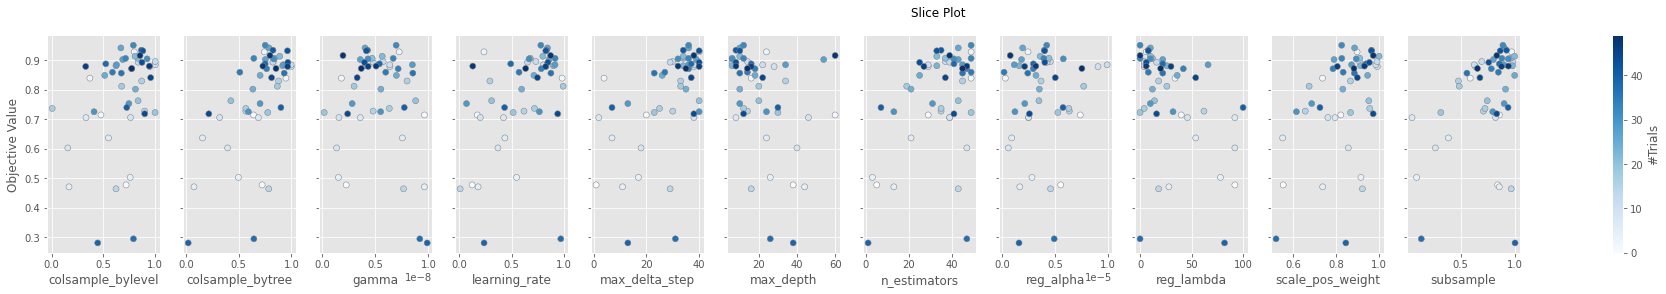

In [19]:
optuna.visualization.matplotlib.plot_slice(study)